<a href="https://colab.research.google.com/github/zobayer-al-mahmud/Regression-models-on-housing-dataset/blob/main/Regression_Models_on_Housing_Dataset(Zobayer_Al_Mahmud)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project: Regression Models on Housing Dataset**

# 1. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# 2. Load a Simple Dataset

/tmp/ipython-input-3551196759.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  housing = pd.read_csv(data_url, delim_whitespace=True, names=columns)


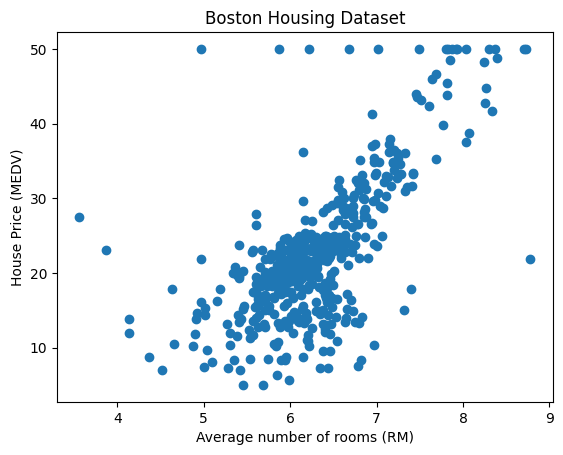

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a simple dataset
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"

# Load dataset (Boston Housing)
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

housing = pd.read_csv(data_url, delim_whitespace=True, names=columns)

# Use only one input feature: RM (average rooms)
X = housing['RM'].values.reshape(-1, 1) # shape (m, 1)
y = housing['MEDV'].values.reshape(-1, 1) # shape (m, 1); MEDV is in $1000s

plt.scatter(X, y)
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("House Price (MEDV)")
plt.title("Boston Housing Dataset")
plt.show()


In [ ]:
print(X[:5])

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]


In [ ]:
print(y[:5])

[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]]


In [ ]:
len(housing)

506

In [ ]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# Drop rows with any null values
housing.dropna(inplace=True)

# Verify no nulls left
print(housing.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


# **3. Linear Regression with Gradient Descent**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'RM' is numeric and handle potential errors (though it should be)
housing['RM'] = pd.to_numeric(housing['RM'], errors='coerce')

# Drop rows where 'RM' is NaN after conversion (should not happen with this dataset)
housing.dropna(subset=['RM'], inplace=True)


# -------------------------
# 1) Normalize X for stability
# -------------------------
# Re-select X after cleaning 'RM' and dropping rows
X = housing['RM'].values.reshape(-1, 1)

X_mean, X_std = X.mean(), X.std()
# Add a small epsilon to X_std to avoid division by zero if X_std is 0
epsilon = 1e-8
Xn = (X - X_mean) / (X_std + epsilon)
x = Xn.flatten()
m = len(x)

In [ ]:
print(m)

506


In [ ]:
print(Xn[:5])

[[0.41367188]
 [0.19427445]
 [1.28271366]
 [1.01630249]
 [1.22857663]]


In [ ]:
# -------------------------
# 2) Initialize parameters
# -------------------------
np.random.seed(42)
w = np.random.randn()
b = np.random.randn()

In [ ]:
print(w)
print(b)

0.4967141530112327
-0.13826430117118466


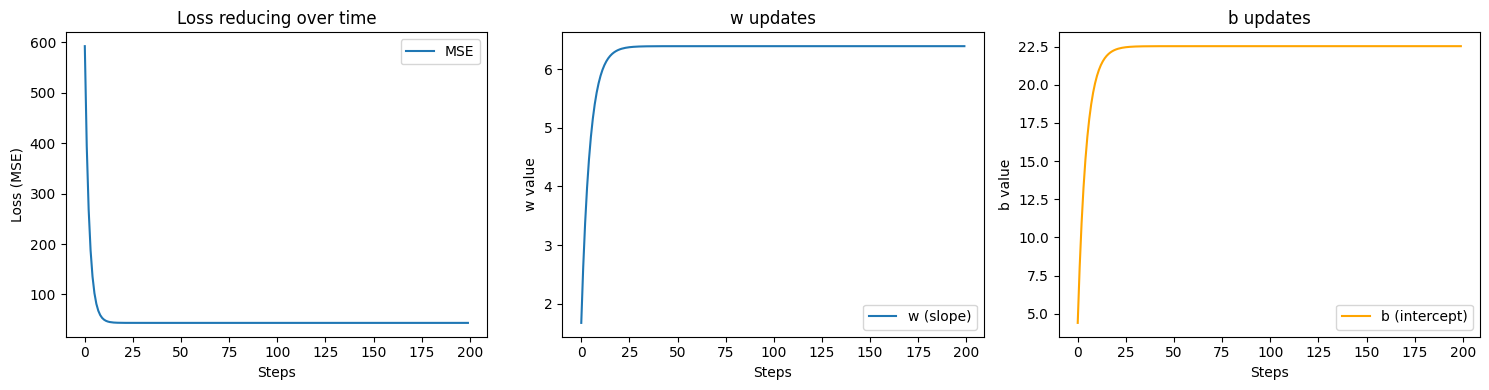

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# # -------------------------
# # 1) Normalize X for stability
# # -------------------------
# X_mean, X_std = X.mean(), X.std()
# Xn = (X - X_mean) / X_std
# x = Xn.flatten()
# m = len(x)

# -------------------------
# 2) Initialize parameters
# -------------------------
# np.random.seed(42)
# w = np.random.randn()
# b = np.random.randn()

# -------------------------
# 3) Train with logging
# -------------------------
eta = 0.1
steps = 200   # reduce for visualization

# Logs
w_log, b_log, loss_log = [], [], []

for t in range(steps):
    # Predictions
    y_hat = w * x + b  # Current result for this (w,b)-> prediction
    residuals = y_hat - y.flatten()  # predict-actualvalue (error)

    # Gradients
    dw = (2/m) * np.dot(residuals, x) # Loss function partial derivative with respect to W
    db = (2/m) * residuals.sum()  # Loss function partial derivative with respect to b

    # Update
    w = w - eta * dw  # wnew= wold -eta*dw
    b = b - eta * db  # bnew= bold -eta*db

    # Compute loss (MSE)
    J = (residuals**2).mean()   # loss = 1/m * (y_hat-y)^2  #mean

    # Log values
    w_log.append(w)
    b_log.append(b)
    loss_log.append(J)

# -------------------------
# 4) Plot results
# -------------------------

plt.figure(figsize=(15,4))

# Loss curve
plt.subplot(1,3,1)
plt.plot(loss_log, label="MSE")
plt.xlabel("Steps")
plt.ylabel("Loss (MSE)")
plt.title("Loss reducing over time")
plt.legend()

# w trajectory
plt.subplot(1,3,2)
plt.plot(w_log, label="w (slope)")
plt.xlabel("Steps")
plt.ylabel("w value")
plt.title("w updates")
plt.legend()

# b trajectory
plt.subplot(1,3,3)
plt.plot(b_log, label="b (intercept)", color="orange")
plt.xlabel("Steps")
plt.ylabel("b value")
plt.title("b updates")
plt.legend()

plt.tight_layout()
plt.show()


# **4. Predictions & Visualization**

In [ ]:
print(w)
print(b)

6.388975312838433
22.532806324110666


In [ ]:
# ------------------------
# 4) Evaluate the model
# ------------------------
# Build predictions again using the learned w and b
Y_pred = (w * x + b).reshape(-1, 1)

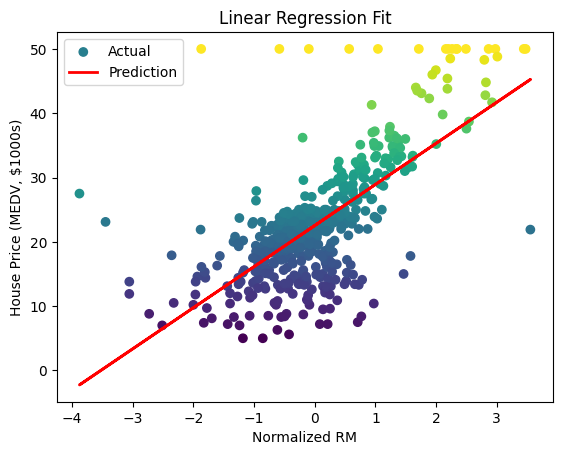

In [ ]:
# ------------------------
# 5) Visualize the fit
# ------------------------
plt.scatter(x, y, label="Actual", c=y) # x is Normalized RM, c=y makes the points colorful based on the house price
plt.plot(x, Y_pred, linewidth=2, label="Prediction", color='red') # make the prediction line red
plt.legend()
plt.xlabel("Normalized RM")
plt.ylabel("House Price (MEDV, $1000s)")
plt.title("Linear Regression Fit")
plt.show()

# **5. Mean Absolute Error (MAE)**

In [ ]:

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, Y_pred)
print("MAE:", mae)


MAE: 4.447772901532233


# **6.Mean Squared Error (MSE)**

In [ ]:

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, Y_pred)
print("MSE:", mse)


MSE: 43.60055177116956


# **7.Root Mean Squared Error (RMSE)**

In [ ]:

rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 6.603071389222561


# **8. R-Squared (R²)**

In [ ]:

from sklearn.metrics import r2_score
r2 = r2_score(y, Y_pred)
print("R²:", r2)


R²: 0.48352545599133423


# **Using Multiple Varibales**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------
# 1. Load Boston Housing Dataset
# -----------------------------
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
housing = pd.read_csv(data_url, delim_whitespace=True, names=columns)

# -----------------------------
# 2. Prepare Features and Target
# -----------------------------
X = housing.drop("MEDV", axis=1)  # all features except target
y = housing["MEDV"]               # target (house price in $1000s)


/tmp/ipython-input-3988353752.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  housing = pd.read_csv(data_url, delim_whitespace=True, names=columns)


In [ ]:
# 3. Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
len(X_train.columns)

13

In [ ]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28


In [ ]:
y_train

,MEDV
477,12.0
15,19.9
332,19.4
423,13.4
19,18.2
...,...
106,19.5
270,21.1
348,24.5
435,13.4


In [ ]:
# -----------------------------
# 4. Train Linear Regression
# -----------------------------
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

# **Split the Dataset**

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (404, 13)
Testing features shape: (102, 13)
Training target shape: (404,)
Testing target shape: (102,)


# **Train Models**

In [ ]:
# Train Models
# -----------------------------
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print("Linear Regression model trained.")

# Initialize and train Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
print("Ridge Regression model trained.")

# Initialize and train Lasso Regression model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
print("Lasso Regression model trained.")

Linear Regression model trained.
Ridge Regression model trained.
Lasso Regression model trained.


# **Evaluate Models**

In [ ]:
# -----------------------------
# 6. Evaluation Metrics
# -----------------------------

# Calculate metrics for Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Calculate metrics for Ridge Regression
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Calculate metrics for Lasso Regression
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print the metrics (optional, will be in the table)
print("Evaluation metrics calculated for all models.")

# The plotting code will be handled separately based on the plan.

Evaluation metrics calculated for all models.


Model Performance on Test Data:
MAE : 3.19
MSE : 24.29
RMSE: 4.93
R²  : 0.669


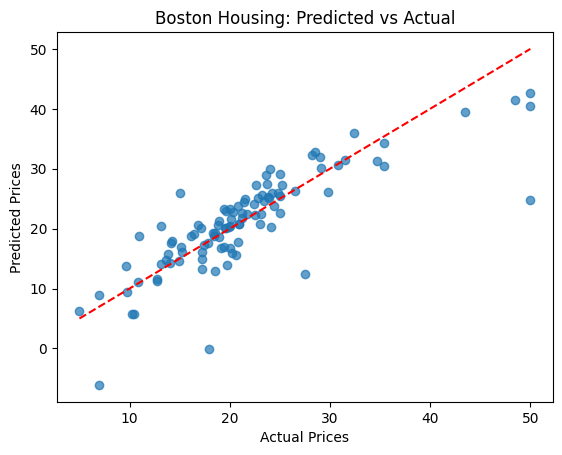

In [ ]:
# -----------------------------
# 6. Evaluation Metrics
# -----------------------------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance on Test Data:")
print(f"MAE : {mae:,.2f}")
print(f"MSE : {mse:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²  : {r2:.3f}")

# -----------------------------
# 7. Plot Predicted vs Actual
# -----------------------------
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Boston Housing: Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")  # ideal line
plt.show()


# **Compare Results**

In [ ]:
# Make predictions using each model
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

In [ ]:
# Create a DataFrame to store the evaluation metrics
metrics_data = {
    'MAE': [mae_linear, mae_ridge, mae_lasso],
    'MSE': [mse_linear, mse_ridge, mse_lasso],
    'RMSE': [rmse_linear, rmse_ridge, rmse_lasso],
    'R²': [r2_linear, r2_ridge, r2_lasso]
}

metrics_df = pd.DataFrame(metrics_data, index=['Linear Regression', 'Ridge Regression', 'Lasso Regression'])

# Display the DataFrame
display(metrics_df)

,MAE,MSE,RMSE,R²
Linear Regression,3.189092,24.291119,4.928602,0.668759
Ridge Regression,3.132947,24.477191,4.947443,0.666222
Lasso Regression,3.253540,24.409490,4.940596,0.667145


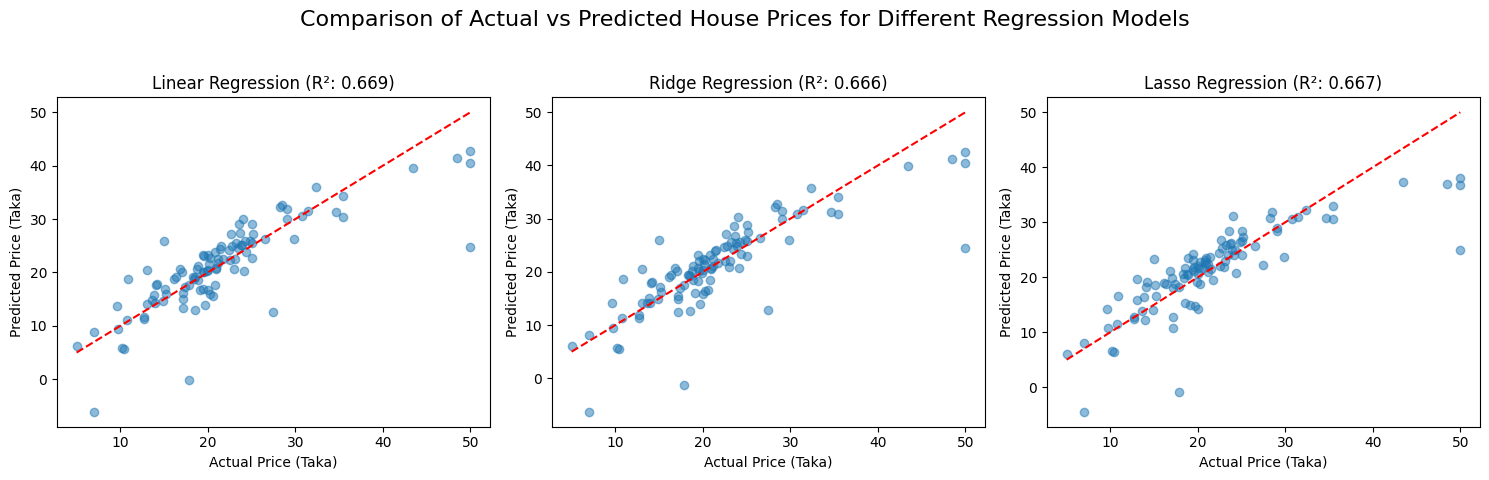

In [ ]:
# Visualize predictions vs actual values for each model
plt.figure(figsize=(15, 5))
plt.suptitle("Comparison of Actual vs Predicted House Prices for Different Regression Models", fontsize=16) # Add a main title

# Plot for Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.xlabel("Actual Price (Taka)")
plt.ylabel("Predicted Price (Taka)")
plt.title(f"Linear Regression (R²: {r2_linear:.3f})") # Add R-squared to title
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")


# Plot for Ridge Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.xlabel("Actual Price (Taka)")
plt.ylabel("Predicted Price (Taka)")
plt.title(f"Ridge Regression (R²: {r2_ridge:.3f})") # Add R-squared to title
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")


# Plot for Lasso Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.xlabel("Actual Price (Taka)")
plt.ylabel("Predicted Price (Taka)")
plt.title(f"Lasso Regression (R²: {r2_lasso:.3f})") # Add R-squared to title
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()